# ROC和AUC定义

    ROC全称是“受试者工作特征”（Receiver Operating Characteristic）。ROC曲线的面积就是AUC（Area Under the Curve）。AUC用于衡量“二分类问题”机器学习算法性能（泛化能力）。

    Python中sklearn直接提供了用于计算ROC的函数[1]，下面就把函数背后的计算过程详细讲一下。

# 计算ROC需要知道的关键概念

首先，解释几个二分类问题中常用的概念：True Positive, False Positive, True Negative, False Negative。它们是根据真实类别与预测类别的组合来区分的。

    假设有一批test样本，这些样本只有两种类别：正例和反例。机器学习算法预测类别如下图（左半部分预测类别为正例，右半部分预测类别为反例），而样本中真实的正例类别在上半部分，下半部分为真实的反例。

    预测值为正例，记为P（Positive）
    预测值为反例，记为N（Negative）
    预测值与真实值相同，记为T（True）
    预测值与真实值相反，记为F（False）

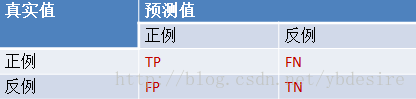

    TP：预测类别是P（正例），真实类别也是P
    FP：预测类别是P，真实类别是N（反例）
    TN：预测类别是N，真实类别也是N
    FN：预测类别是N，真实类别是P

    样本中的真实正例类别总数即TP+FN。TPR即True Positive Rate，TPR = TP/(TP+FN)
    同理，样本中的真实反例类别总数为FP+TN。FPR即False Positive Rate，FPR=FP/(TN+FP)。

    还有一个概念叫”截断点”。机器学习算法对test样本进行预测后，可以输出各test样本对某个类别的相似度概率。比如t1是P类别的概率为0.3，一般我们认为概率低于0.5，t1就属于类别N。这里的0.5，就是”截断点”。
    
总结一下，对于计算ROC，最重要的三个概念就是TPR, FPR, 截断点。

    截断点取不同的值，TPR和FPR的计算结果也不同。将截断点不同取值下对应的TPR和FPR结果画于二维坐标系中得到的曲线，就是ROC曲线。横轴用FPR表示。

# P-R曲线

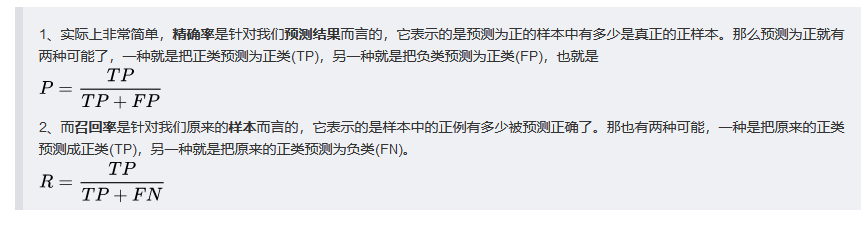

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn.model_selection import train_test_split

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
##变为2分类
X, y = X[y != 2], y[y != 2]

In [3]:
X = np.random.randn(10000).reshape(1000, 10)
y = np.random.randint(0,2, 1000)
y[]

In [19]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
 
# shuffle and split training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [20]:
from sklearn import svm
# Learn to predict each class against the other
svm = svm.SVC(kernel='linear', probability=True,random_state=random_state)
svm.fit(X_train, y_train)
###通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
y_score = svm.decision_function(X_test)

In [21]:
###按照y_score 排序, 查准率
idx = np.argsort(-y_score)
y_score = y_score[idx]
y_test = y_test[idx]

P, R = [], []
for i in range(1,len(y_test)+1):
    P.append(y_test[:i].sum()/i)
    R.append(y_test[:i].sum()/y_test.sum())
P = np.array(P)
R = np.array(R)

<Figure size 432x288 with 0 Axes>

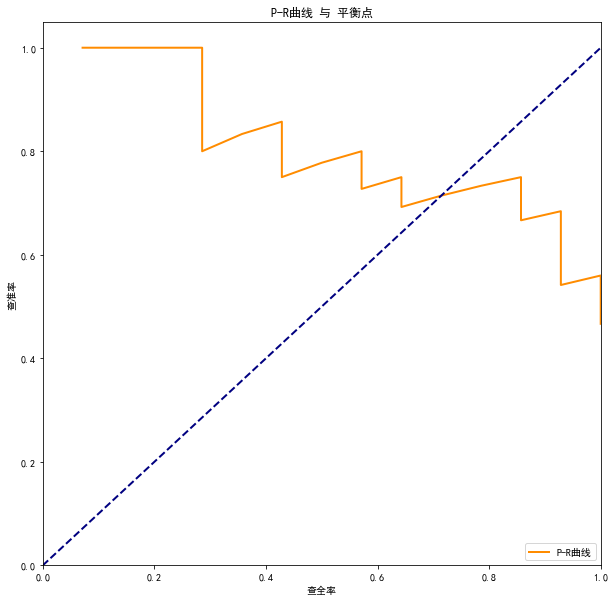

In [22]:
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(R, P, color='darkorange',
         lw=lw, label='P-R曲线') ###假正率为横坐标，真正率为纵坐标做曲线

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('查全率')
plt.ylabel('查准率')
plt.title('P-R曲线 与 平衡点')
plt.legend(loc="lower right")
plt.show()

# 绘制ROC曲线，计算AUC

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn.model_selection import train_test_split

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
##变为2分类
X, y = X[y != 2], y[y != 2]

In [24]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
 
# shuffle and split training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [25]:
from sklearn import svm
# Learn to predict each class against the other
svm = svm.SVC(kernel='linear', probability=True,random_state=random_state)
svm.fit(X_train, y_train)
###通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
y_score = svm.decision_function(X_test)
y_score

array([-0.16480981, -0.51381741, -0.16780482,  0.1531229 ,  0.17050838,
       -0.05608419, -0.48622099, -0.18126462, -0.37875273,  0.5647351 ,
       -0.15941239, -0.56484681, -0.46248607,  0.36058767, -0.07438907,
       -0.35862839, -0.43526297,  0.38648007,  0.09652266,  0.07925455,
       -0.37617431, -0.06643449, -0.14642953, -0.08706684, -0.1591981 ,
        0.36622328,  0.3155603 ,  0.34939783, -0.2139696 , -0.18641928])

In [26]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
fpr,tpr,threshold, roc_auc

(array([0.        , 0.        , 0.        , 0.08333333, 0.08333333,
        0.16666667, 0.16666667, 0.25      , 0.25      , 0.41666667,
        0.41666667, 1.        ]),
 array([0.        , 0.05555556, 0.44444444, 0.44444444, 0.55555556,
        0.55555556, 0.83333333, 0.83333333, 0.88888889, 0.88888889,
        1.        , 1.        ]),
 array([ 1.5647351 ,  0.5647351 ,  0.1531229 ,  0.09652266, -0.05608419,
        -0.06643449, -0.15941239, -0.16480981, -0.16780482, -0.18641928,
        -0.35862839, -0.56484681]),
 0.8842592592592592)

<Figure size 432x288 with 0 Axes>

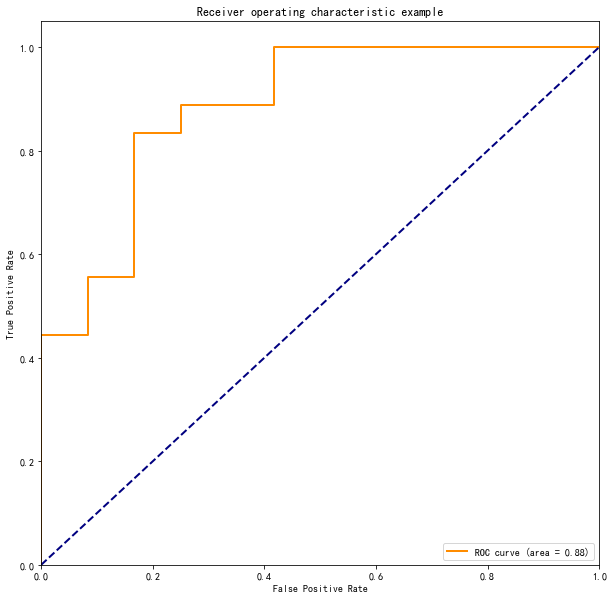

In [27]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [163]:
def acu_curve(y,prob):
        fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
        roc_auc = auc(fpr,tpr) ###计算auc的值
     
        plt.figure()
        lw = 2
        plt.figure(figsize=(10,10))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
     
        plt.show()

# 多个AUC

In [164]:
from sklearn import svm
svm = svm.SVC(kernel='linear', probability=True,random_state=random_state)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

models = [svm, lr]

In [165]:
y_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_scores.append(model.decision_function(X_test))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

In [172]:
fpr, tpr, threshold, roc_auc = [], [], [], []
for y_score in y_scores:
    x, y, z = roc_curve(y_test, y_score)
    fpr.append(x), tpr.append(y), threshold.append(z)
    roc_auc.append(auc(x, y))

<Figure size 432x288 with 0 Axes>

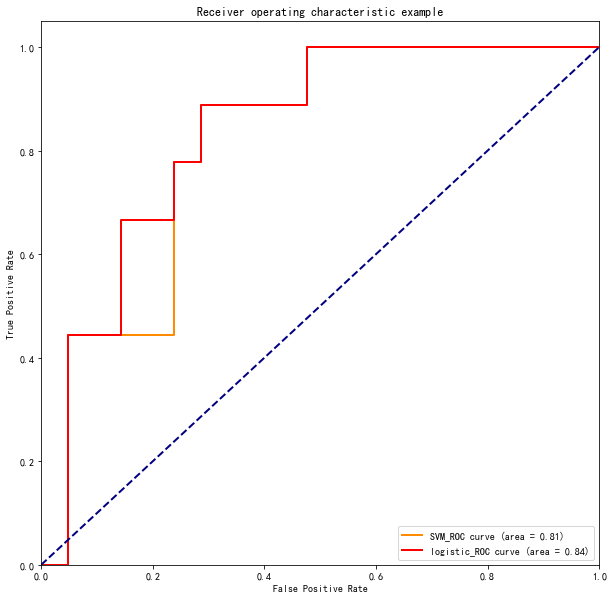

In [175]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='SVM_ROC curve (area = %0.2f)' % roc_auc[0]) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot(fpr[1], tpr[1], color='red',
         lw=lw, label='logistic_ROC curve (area = %0.2f)' % roc_auc[1]) ###假正率为横坐标，真正率为纵坐标做曲线

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()